In [1]:
!pip install scipy opencv-python matplotlib tqdm scikit-learn
from google.colab import drive
drive.mount('/content/drive')  # if using Google Drive


Mounted at /content/drive


In [2]:
import os

# Create folders if not already present
os.makedirs('/content/data/raw_images', exist_ok=True)
os.makedirs('/content/data/roi_images', exist_ok=True)

In [3]:
import scipy.io

# Load the mat file
mat = scipy.io.loadmat("/content/OrigaList.mat")
origa = mat['Origa']


In [5]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/Images.raw.zip'  # adjust if in drive
extract_path = '/content/data/raw_images'

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [7]:
# Move all images from 'Images' subfolder to 'raw_images'
!mv /content/data/raw_images/Images/* /content/data/raw_images/

# Remove the empty 'Images' folder
!rm -r /content/data/raw_images/Images

# Verify the images are now directly under 'raw_images'
!ls /content/data/raw_images/


001.jpg  074.jpg  147.jpg  220.jpg  293.jpg  366.jpg  439.jpg  512.jpg	585.jpg
002.jpg  075.jpg  148.jpg  221.jpg  294.jpg  367.jpg  440.jpg  513.jpg	586.jpg
003.jpg  076.jpg  149.jpg  222.jpg  295.jpg  368.jpg  441.jpg  514.jpg	587.jpg
004.jpg  077.jpg  150.jpg  223.jpg  296.jpg  369.jpg  442.jpg  515.jpg	588.jpg
005.jpg  078.jpg  151.jpg  224.jpg  297.jpg  370.jpg  443.jpg  516.jpg	589.jpg
006.jpg  079.jpg  152.jpg  225.jpg  298.jpg  371.jpg  444.jpg  517.jpg	590.jpg
007.jpg  080.jpg  153.jpg  226.jpg  299.jpg  372.jpg  445.jpg  518.jpg	591.jpg
008.jpg  081.jpg  154.jpg  227.jpg  300.jpg  373.jpg  446.jpg  519.jpg	592.jpg
009.jpg  082.jpg  155.jpg  228.jpg  301.jpg  374.jpg  447.jpg  520.jpg	593.jpg
010.jpg  083.jpg  156.jpg  229.jpg  302.jpg  375.jpg  448.jpg  521.jpg	594.jpg
011.jpg  084.jpg  157.jpg  230.jpg  303.jpg  376.jpg  449.jpg  522.jpg	595.jpg
012.jpg  085.jpg  158.jpg  231.jpg  304.jpg  377.jpg  450.jpg  523.jpg	596.jpg
013.jpg  086.jpg  159.jpg  232.jpg  305.jpg  378.jpg

In [8]:
import cv2
import numpy as np
from tqdm import tqdm
import glob

processed_path = '/content/data/processed_images/'
os.makedirs(processed_path, exist_ok=True)

img_size = 256

for filepath in tqdm(glob.glob(extract_path + "*.jpg")):
    img = cv2.imread(filepath)
    img = cv2.resize(img, (img_size, img_size))
    img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
    filename = os.path.basename(filepath)
    cv2.imwrite(os.path.join(processed_path, filename), img)


0it [00:00, ?it/s]


Checking

In [9]:
!ls /content/data/raw_images/


001.jpg  074.jpg  147.jpg  220.jpg  293.jpg  366.jpg  439.jpg  512.jpg	585.jpg
002.jpg  075.jpg  148.jpg  221.jpg  294.jpg  367.jpg  440.jpg  513.jpg	586.jpg
003.jpg  076.jpg  149.jpg  222.jpg  295.jpg  368.jpg  441.jpg  514.jpg	587.jpg
004.jpg  077.jpg  150.jpg  223.jpg  296.jpg  369.jpg  442.jpg  515.jpg	588.jpg
005.jpg  078.jpg  151.jpg  224.jpg  297.jpg  370.jpg  443.jpg  516.jpg	589.jpg
006.jpg  079.jpg  152.jpg  225.jpg  298.jpg  371.jpg  444.jpg  517.jpg	590.jpg
007.jpg  080.jpg  153.jpg  226.jpg  299.jpg  372.jpg  445.jpg  518.jpg	591.jpg
008.jpg  081.jpg  154.jpg  227.jpg  300.jpg  373.jpg  446.jpg  519.jpg	592.jpg
009.jpg  082.jpg  155.jpg  228.jpg  301.jpg  374.jpg  447.jpg  520.jpg	593.jpg
010.jpg  083.jpg  156.jpg  229.jpg  302.jpg  375.jpg  448.jpg  521.jpg	594.jpg
011.jpg  084.jpg  157.jpg  230.jpg  303.jpg  376.jpg  449.jpg  522.jpg	595.jpg
012.jpg  085.jpg  158.jpg  231.jpg  304.jpg  377.jpg  450.jpg  523.jpg	596.jpg
013.jpg  086.jpg  159.jpg  232.jpg  305.jpg  378.jpg

In [10]:
import os

raw_images_dir = "/content/data/raw_images"
image_files = [f for f in os.listdir(raw_images_dir) if f.endswith('.jpg')]
print(f"Total images found: {len(image_files)}")


Total images found: 650


In [11]:
total_images = origa.shape[1]


In [12]:
print(origa)


[[(array(['OD'], dtype='<U2'), array(['001.jpg'], dtype='<U7'), array([[0.7097]]), array(['A'], dtype='<U1'), array([[0]], dtype=uint8))
  (array(['OS'], dtype='<U2'), array(['002.jpg'], dtype='<U7'), array([[0.6953]]), array(['A'], dtype='<U1'), array([[0]], dtype=uint8))
  (array(['OS'], dtype='<U2'), array(['003.jpg'], dtype='<U7'), array([[0.9629]]), array(['A'], dtype='<U1'), array([[0]], dtype=uint8))
  (array(['OD'], dtype='<U2'), array(['004.jpg'], dtype='<U7'), array([[0.7246]]), array(['A'], dtype='<U1'), array([[0]], dtype=uint8))
  (array(['OS'], dtype='<U2'), array(['005.jpg'], dtype='<U7'), array([[0.6138]]), array(['A'], dtype='<U1'), array([[0]], dtype=uint8))
  (array(['OD'], dtype='<U2'), array(['006.jpg'], dtype='<U7'), array([[0.6451]]), array(['B'], dtype='<U1'), array([[0]], dtype=uint8))
  (array(['OS'], dtype='<U2'), array(['007.jpg'], dtype='<U7'), array([[0.5255]]), array(['A'], dtype='<U1'), array([[0]], dtype=uint8))
  (array(['OD'], dtype='<U2'), array(['00

In [17]:
from tqdm import tqdm

# List all jpg files
image_files = sorted([f for f in os.listdir('/content/data/raw_images') if f.endswith('.jpg')])

print(f"Total images found: {len(image_files)}")

for file in tqdm(image_files):
    src_path = f"/content/data/raw_images/{file}"
    dst_path = f"/content/data/roi_images/{file}"
    extract_roi_brightest_spot(src_path, dst_path)


Total images found: 650


100%|██████████| 650/650 [00:28<00:00, 22.70it/s]


In [23]:
import cv2
import numpy as np
import os
from tqdm import tqdm

def extract_optic_disc_roi_enhanced(src_path, dst_path, roi_size=256):
    img = cv2.imread(src_path)

    if img is None:
        print(f"❌ Failed to read: {src_path}")
        return

    # Resize to standard size for consistent processing
    img_resized = cv2.resize(img, (512, 512))

    # Extract red channel
    red_channel = img_resized[:, :, 2]

    # Apply CLAHE to enhance contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    red_enhanced = clahe.apply(red_channel)

    # Blur and threshold
    blurred = cv2.GaussianBlur(red_enhanced, (11, 11), 0)
    _, thresh = cv2.threshold(blurred, 220, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not contours:
        print(f"⚠️ No optic disc detected in {src_path}")
        return

    # Select largest contour (likely optic disc)
    largest_contour = max(contours, key=cv2.contourArea)
    (x, y), radius = cv2.minEnclosingCircle(largest_contour)
    x, y, r = int(x), int(y), int(radius)

    # Calculate ROI coordinates
    x1 = max(x - roi_size // 2, 0)
    y1 = max(y - roi_size // 2, 0)
    x2 = x1 + roi_size
    y2 = y1 + roi_size

    # Crop and save
    roi = img_resized[y1:y2, x1:x2]
    if roi.shape[0] != roi_size or roi.shape[1] != roi_size:
        print(f"⚠️ Skipped due to incorrect crop size: {src_path}")
        return

    os.makedirs(os.path.dirname(dst_path), exist_ok=True)
    cv2.imwrite(dst_path, roi)



In [24]:
RAW_PATH = "/content/data/raw_images"
DST_PATH = "/content/data/roi_images"

image_files = sorted([f for f in os.listdir(RAW_PATH) if f.endswith('.jpg')])

for filename in tqdm(image_files):
    src_path = os.path.join(RAW_PATH, filename)
    dst_path = os.path.join(DST_PATH, filename)
    extract_optic_disc_roi_enhanced(src_path, dst_path)


 34%|███▍      | 223/650 [00:10<00:14, 29.51it/s]

⚠️ Skipped due to incorrect crop size: /content/data/raw_images/218.jpg


 49%|████▉     | 321/650 [00:15<00:15, 21.52it/s]

⚠️ Skipped due to incorrect crop size: /content/data/raw_images/317.jpg


 78%|███████▊  | 510/650 [00:22<00:07, 18.49it/s]

⚠️ Skipped due to incorrect crop size: /content/data/raw_images/508.jpg


100%|██████████| 650/650 [00:28<00:00, 22.94it/s]


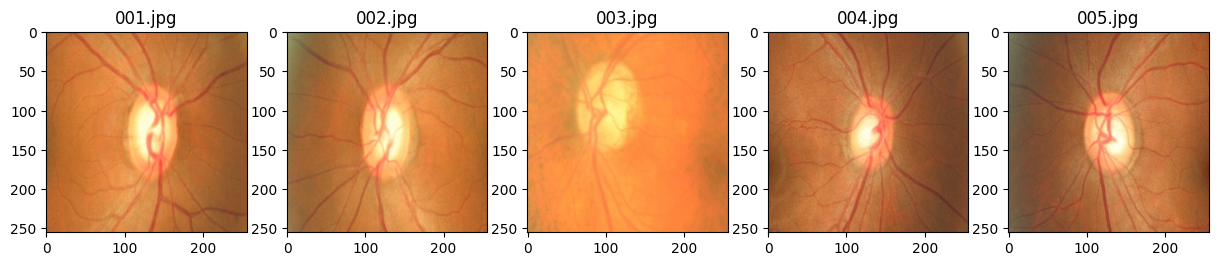

In [27]:
import matplotlib.pyplot as plt

roi_images = sorted([f for f in os.listdir(DST_PATH) if f.endswith('.jpg')])
plt.figure(figsize=(15, 5))
for i in range(5):
    roi_path = os.path.join(DST_PATH, roi_images[i])
    roi_img = cv2.imread(roi_path)
    roi_rgb = cv2.cvtColor(roi_img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 5, i+1)
    plt.imshow(roi_rgb)
    plt.title(roi_images[i])
    plt.axis('on')
plt.show()


In [28]:
import os

base_dir = "/content/data"

folders = [
    "raw_images",      # original .jpg images (already placed by you)
    "roi_images",      # ROI extracted center-cropped images
    "masks",           # predicted disc/cup masks from U-Net
    "segmented",       # overlay images with mask + fundus
]

for folder in folders:
    path = os.path.join(base_dir, folder)
    os.makedirs(path, exist_ok=True)
    print(f"✅ Created: {path}")


✅ Created: /content/data/raw_images
✅ Created: /content/data/roi_images
✅ Created: /content/data/masks
✅ Created: /content/data/segmented


In [29]:
!pip install segmentation-models-pytorch albumentations
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 785.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 36.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [30]:
ROI_DIR = "/content/data/roi_images"
roi_files = sorted([os.path.join(ROI_DIR, f) for f in os.listdir(ROI_DIR) if f.endswith(".jpg")])
print(f"Total ROI images: {len(roi_files)}")


Total ROI images: 650


In [33]:
import os

folders = [
    "/content/data/raw_images",
    "/content/data/roi_images",
    "/content/data/masks/cup",
    "/content/data/masks/disc",
    "/content/data/segmentation_data/images",
    "/content/data/segmentation_data/masks",
    "/content/data/unet_outputs"
]

for folder in folders:
    os.makedirs(folder, exist_ok=True)

print("✅ Folder structure ready.")


✅ Folder structure ready.


In [34]:
import scipy.io
import numpy as np
from PIL import Image
import os

mat_dir = "D:\Glaucoma\unet\ORIGA\ORIGA\Semi-automatic-annotations"  # put your .mat files here
output_disc = "/content/data/masks/disc"
output_cup = "/content/data/masks/cup"

for mat_file in os.listdir(mat_dir):
    if mat_file.endswith(".mat"):
        mat = scipy.io.loadmat(os.path.join(mat_dir, mat_file))
        mask = mat['mask']  # replace with actual variable name if different

        # Split masks
        disc_mask = (mask == 1).astype(np.uint8) * 255
        cup_mask = (mask == 2).astype(np.uint8) * 255

        base_name = mat_file.replace('.mat', '.png')
        Image.fromarray(disc_mask).save(os.path.join(output_disc, base_name))
        Image.fromarray(cup_mask).save(os.path.join(output_cup, base_name))

print("✅ Disc and cup masks created.")


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 11-12: truncated \uXXXX escape (<ipython-input-34-3025937436>, line 6)